In [2]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as acc

import datasets as ds_own
from cnn_models import Simple_CNN
from ensemble import Ensemble

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Load data

In [3]:
class_names = ds_own.CLASS_NAMES
class_dict = ds_own.CLASS_DICT

val_data = ds_own.cifar_val
labels = pd.read_csv('Cifar10/valLabels.csv').label
labels = labels.map(class_dict)

# Create ensemble from CNN models 
### (replace model{i} with model{i}_aug in model paths to get models trained on augmented data)

In [8]:
model = Ensemble(model_paths=['saved_models/model1.pt', 'saved_models/model2.pt', 'saved_models/model3.pt'])
model1, model2, model3 = model.models

# Compute predictions

In [ ]:
pred_mean = [np.nan] * len(val_data)
pred_max = [np.nan] * len(val_data)
pred_model1 = [np.nan] * len(val_data)
pred_model2 = [np.nan] * len(val_data)
pred_model3 = [np.nan] * len(val_data)

for i in tqdm(range(len(val_data))):
    pred_mean[i] = model.predict_mean(val_data[i][0].unsqueeze(0))
    pred_max[i] = model.predict_max(val_data[i][0].unsqueeze(0))
    pred_model1[i] = model1.predict_class(val_data[i][0].unsqueeze(0))
    pred_model2[i] = model2.predict_class(val_data[i][0].unsqueeze(0))
    pred_model3[i] = model3.predict_class(val_data[i][0].unsqueeze(0))


In [6]:
# load predictions (if needed)
pred_mean = pd.read_pickle('ensemble_data/predictions_mean_model_series')
pred_max = pd.read_pickle('ensemble_data/predictions_max_model_series')
pred_model1 = pd.read_pickle('ensemble_data/predictions_model1_model_series')
pred_model2 = pd.read_pickle('ensemble_data/predictions_model2_model_series')
pred_model3 = pd.read_pickle('ensemble_data/predictions_model3_model_series')

In [9]:
# convert list of tensor to list of int
pred_model1comp = [int(pred_model1[i]) for i in range(len(pred_model1))]
pred_model2comp = [int(pred_model2[i]) for i in range(len(pred_model2))]
pred_model3comp = [int(pred_model3[i]) for i in range(len(pred_model3))]


# Accuracy scores for models

In [ ]:
def accuracy_score(pred, labels):
    return np.mean(pred == labels)

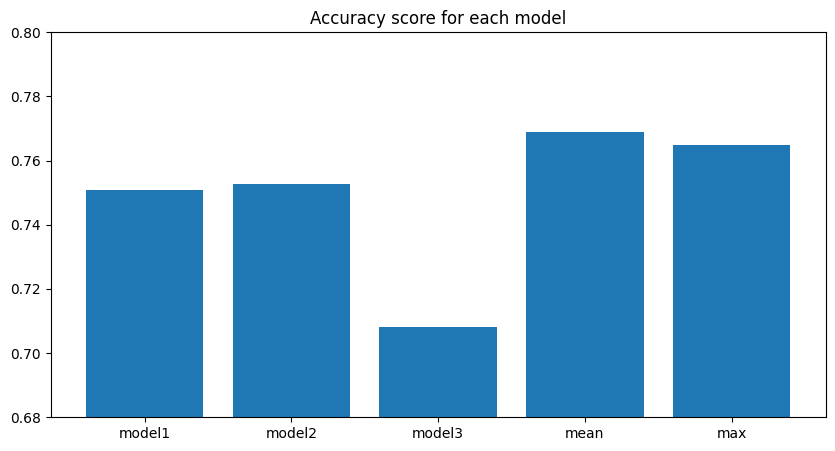

In [10]:
plt.figure(figsize=(10, 5))
plt.bar(['model1', 'model2', 'model3', 'mean', 'max'], [accuracy_score(labels, pred_model1comp), accuracy_score(labels, pred_model2comp), accuracy_score(labels, pred_model3comp), accuracy_score(labels, pred_mean), accuracy_score(labels, pred_max)])
plt.title('Accuracy score for each model')
plt.ylim(0.68, 0.8)
plt.show()


# Confusion matrices for ensemble models

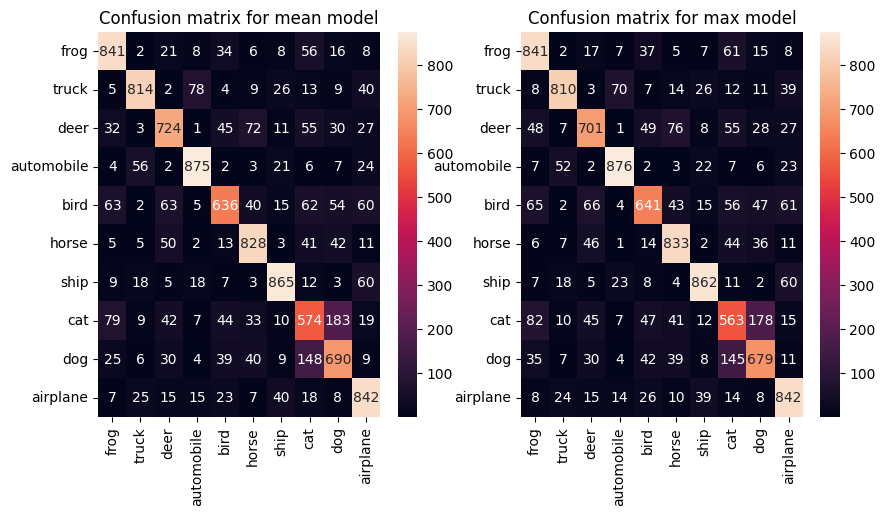

In [11]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(labels, pred_mean), annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion matrix for mean model')
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(labels, pred_max), annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion matrix for max model')
plt.show()


# Confusion matrices for single, separate models

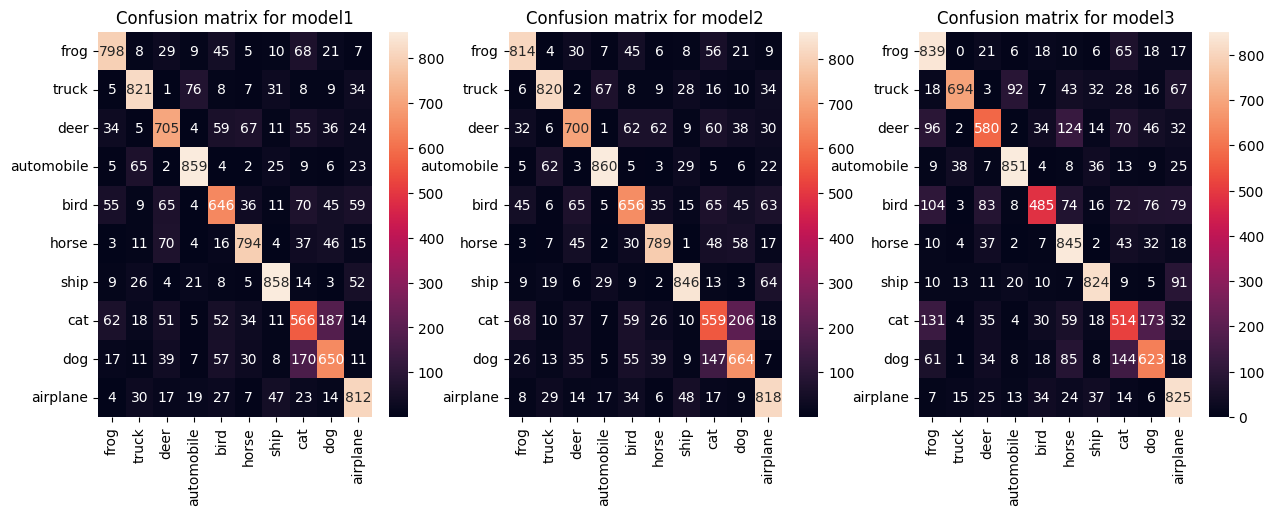

In [12]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.heatmap(confusion_matrix(labels, pred_model1comp), annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion matrix for model1')
plt.subplot(1, 3, 2)
sns.heatmap(confusion_matrix(labels, pred_model2comp), annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion matrix for model2')
plt.subplot(1, 3, 3)
sns.heatmap(confusion_matrix(labels, pred_model3comp), annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion matrix for model3')
plt.show()


# Accuracy scores for separate classes of dataset

In [14]:
pred_mean_ser = pd.Series(pred_mean)
pred_max_ser = pd.Series(pred_max)
pred_model1_ser = pd.Series(pred_model1)
pred_model2_ser = pd.Series(pred_model2)
pred_model3_ser = pd.Series(pred_model3)


In [ ]:
accuracies_mean = [np.NaN] * 10
accuracies_max = [np.NaN] * 10
accuracies_model1 = [np.NaN] * 10
accuracies_model2 = [np.NaN] * 10
accuracies_model3 = [np.NaN] * 10
for i in range(10):
    accuracies_mean[i] = np.mean(labels[labels==i]==pred_mean_ser[labels==i])
    accuracies_max[i] = np.mean(labels[labels==i]==pred_max_ser[labels==i])
    accuracies_model1[i] = np.mean(labels[labels==i]==pred_model1_ser[labels==i])
    accuracies_model2[i] = np.mean(labels[labels==i]==pred_model2_ser[labels==i])
    accuracies_model3[i] = np.mean(labels[labels==i]==pred_model3_ser[labels==i])

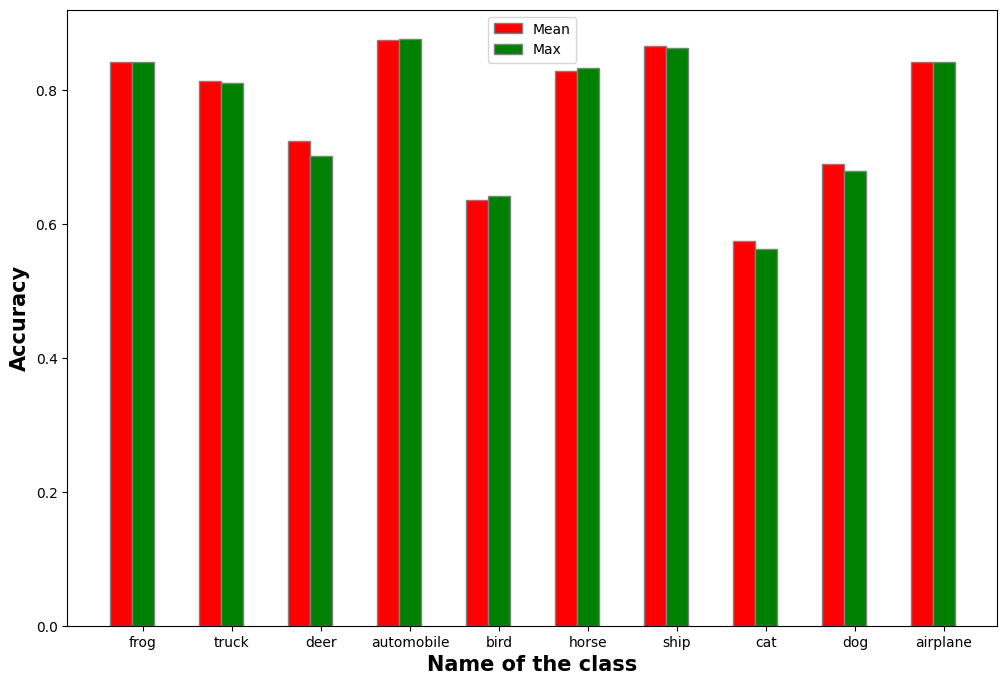

In [27]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
IT = accuracies_mean
ECE = accuracies_max
 
# Set position of bar on X axis
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, IT, color ='r', width = barWidth,
        edgecolor ='grey', label ='Mean')
plt.bar(br2, ECE, color ='g', width = barWidth,
        edgecolor ='grey', label ='Max')
 
# Adding Xticks
plt.xlabel('Name of the class', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT))],
        class_names)
 
plt.legend()
plt.show()

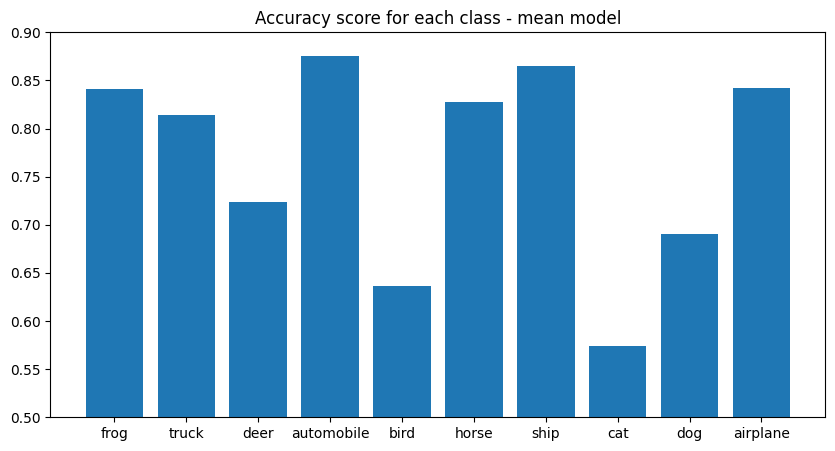

In [17]:

plt.figure(figsize=(10, 5))
plt.bar(class_names, accuracies_mean)
plt.title('Accuracy score for each class - mean model')
plt.ylim(0.5, 0.9)
plt.show()


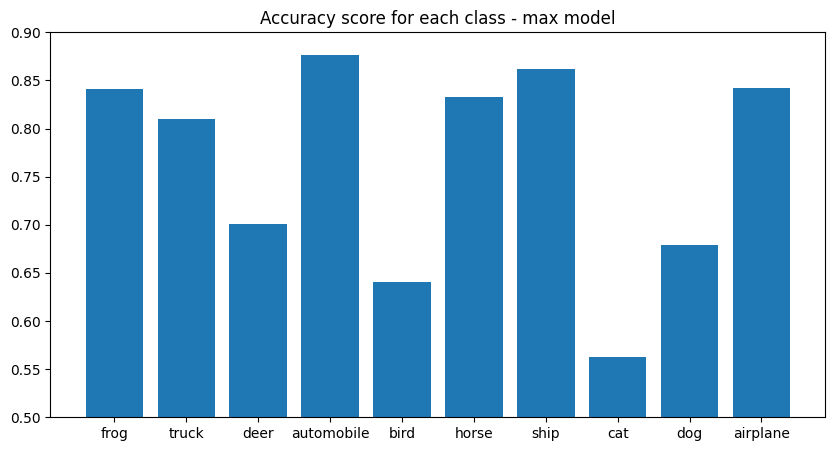

In [18]:

plt.figure(figsize=(10, 5))
plt.bar(class_names, accuracies_max)
plt.title('Accuracy score for each class - max model')
plt.ylim(0.5, 0.9)
plt.show()


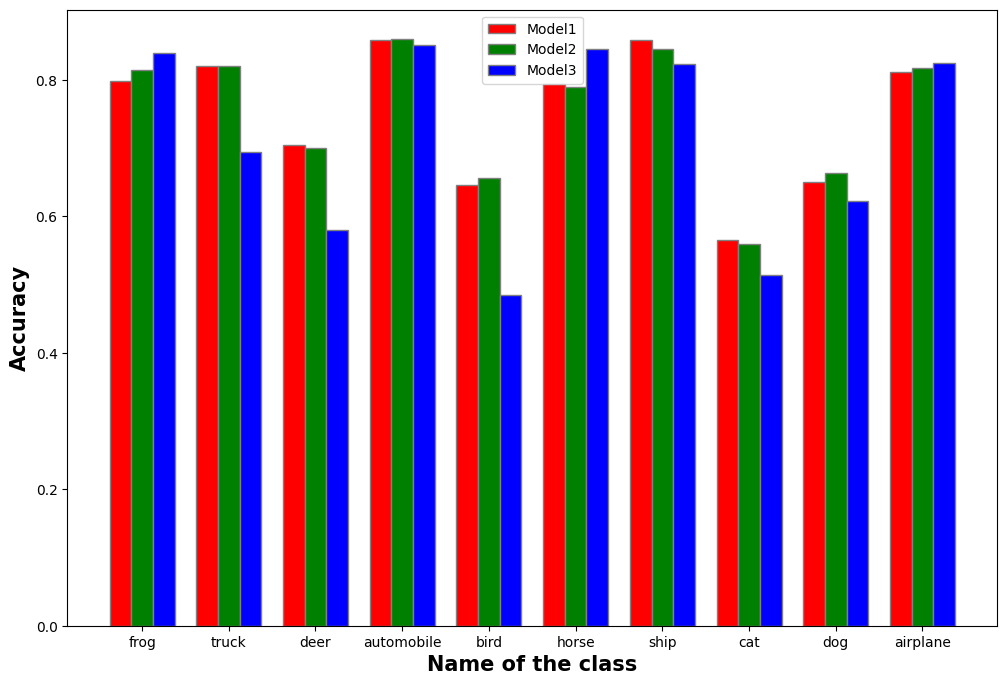

In [24]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
IT = accuracies_model1
ECE = accuracies_model2
CSE = accuracies_model3
 
# Set position of bar on X axis
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, IT, color ='r', width = barWidth,
        edgecolor ='grey', label ='Model1')
plt.bar(br2, ECE, color ='g', width = barWidth,
        edgecolor ='grey', label ='Model2')
plt.bar(br3, CSE, color ='b', width = barWidth,
        edgecolor ='grey', label ='Model3')
 
# Adding Xticks
plt.xlabel('Name of the class', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT))],
        class_names)
 
plt.legend()
plt.show()